1. 전처리
2. Feature Selection
3. Modeling
4. Tuning

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors


In [2]:
os.chdir(r"C:\Users\sora\Tobigs\week3\Ensemble")

In [3]:
train=pd.read_csv("train.csv")

### 변수 설명


- MSSubClass: The building class (주거지의 유형)
- MSZoning: The general zoning classification (판매 분류 ) 건축, 상업 등등
- LotFrontage: Linear feet of street connected to property (주택과 연결된 도로의 선형 feet)
- LotArea: Lot size in square feet
- Street: Type of road access (도로 유형)
- Alley: Type of alley access (골목 type)
- LotShape: General shape of property 
- LandContour: Flatness of the property (평탄도) 
- Utilities: Type of utilities available (사용가능한 utilities 가스 장치)
- LotConfig: Lot configuration (lot 구성) 
- LandSlope: Slope of property (건물 경사)
- Neighborhood: Physical locations within Ames city limits (ames 시내 안 위치 )
- Condition1: Proximity to main road or railroad (도로까지의 인접성)
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling (주거유형, two family, single)
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality (마감 질) 
- OverallCond: Overall condition rating (전체 등급) 
<br>
<br>
- YearBuilt: Original construction date (건축 날짜) 
- YearRemodAdd: Remodel date (리모델 date)
<br>
<br>

- RoofStyle: Type of roof (지붕 형태) 
- RoofMatl: Roof material (지붕 재료)
- Exterior1st: Exterior covering on house (외부 마감 재료)
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type ? 
- MasVnrArea: Masonry veneer area in square feet? 
- ExterQual: Exterior material quality (외부 재료 품질) 
- ExterCond: Present condition of the material on the exterior (현재 재료 품질?)
- Foundation: Type of foundation (기초 공사 type)
- BsmtQual: Height of the basement (지하높이) 
- BsmtCond: General condition of the basement 
- BsmtExposure: Walkout or garden level basement walls (정원, 산책로 벽수준,,?)
- BsmtFinType1: Quality of basement finished area (지하 quality)
- BsmtFinSF1: Type 1 finished square feet 
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area (지하 면적) 
- Heating: Type of heating (heating type)
- HeatingQC: Heating quality and condition (heating 질과 condition)
- CentralAir: Central air conditioning  (에어컨 yes no)
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet (지상 면적) 
- BsmtFullBath: Basement full bathrooms (지하 화장실) 
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade (지상 화장실)
- HalfBath: Half baths above grade 
- Bedroom: Number of bedrooms above basement level 
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality 
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [4]:
#총 79개의 feature(ID,SalePrice제외) 와, 1460개의 관측값
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 1. 데이터 탐색

In [5]:
#label탐색
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 1-1) label 분포

C:\Users\sora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



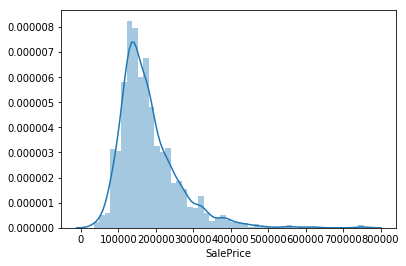

In [6]:
#histogram
#평균인 180921 에 분포하는 정규분포 모양을 띈다.
sns.distplot(train['SalePrice'])

### 1-2)변수가 너무 많으니 결측값이 많은 데이터부터 처리
(Alley,FireplaceQu, PoolQC,Fence(울타리) ,MiscFeature(그이외의 시설)

#### Alley
- Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

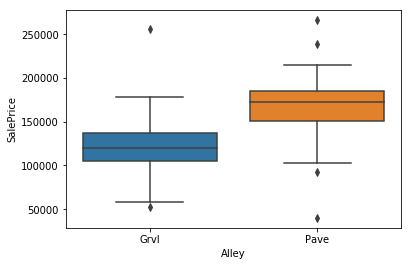

In [7]:

sns.boxplot(y = 'SalePrice', x = 'Alley', data = train)

In [8]:

# 골목의 type 이 saleprice에 아예 관련이 없어 보이진 않음으로, NA로 표시된 값을 None으로 바꿔준다.
#feature 특성상 결측치라 보기엔 어렵기 때문에 None값으로 바꿔준다.
train['Alley'].values
train['Alley'].fillna('None',inplace=True)

train['Alley'].isna().sum()

0

#### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


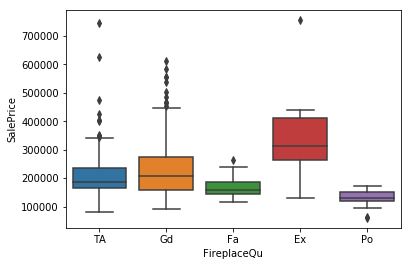

In [9]:
sns.boxplot(y = 'SalePrice', x = 'FireplaceQu', data = train)

FireplaceQu

In [10]:
#FireplaceQu 변수 또한 Label 과 관련이 있어보이기 때문에 삭제하진 않고, None값으로 바꿔준다
train['FireplaceQu'].values
train['FireplaceQu'].fillna('None',inplace=True)

train['FireplaceQu'].isna().sum()

0

PoolQC

In [11]:
##### PoolQC 관측된 값이 7개 이기 때문에, 삭제
del train['PoolQC']

#### Fence(울타리)

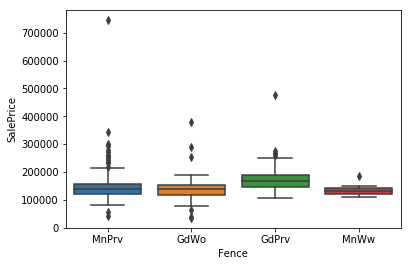

In [12]:
#울타리 타입은, 속성별 saleprice 차이가 크지 않기 때문에 분석에 불필요한 요소라 판단하고 삭제한다.
sns.boxplot(y = 'SalePrice', x = 'Fence', data = train)

del train['Fence']

#### MiscFeature

0

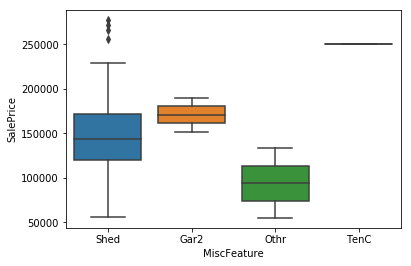

In [13]:
sns.boxplot(y = 'SalePrice', x = 'MiscFeature', data = train)
train['MiscFeature'].values
train['MiscFeature'].fillna('None',inplace=True)
train['MiscFeature'].isna().sum()

## 2.데이터 탐색

## 2-1) feature와 label 간의 관계

### - numeric values와의 관계

LotFrontage,LotArea,'OverallQual',
       'OverallCond',YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,'2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',TotRmsAbvGrd,Fireplaces,'GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
       'ScreenPorch', 'PoolArea',  'MiscVal', 'MoSold', 'YrSold'

#### numeric이지만 범주화 해줘야 하는 변수 <br>
MSSubClass: Identifies the type of dwelling involved in the sale.

    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
   120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150  1-1/2 STORY PUD - ALL AGES
   160  2-STORY PUD - 1946 & NEWER
   180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190  2 FAMILY CONVERSION - ALL STYLES AND AGES


In [14]:
#object로 변경
train['MSSubClass']=train['MSSubClass'].astype(object)

In [15]:
numeric=train.select_dtypes(exclude='object')

In [16]:
numeric.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
del numeric['Id']

### - label과의 상관도 

In [18]:
cor_matrix=train.corr()
cor_matrix
corr=abs(cor_matrix['SalePrice']).sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [19]:
# 상관 계수가  0.1 보다 작은  feature 삭제
low_corr=corr[corr<=0.1].index

train.drop(list(low_corr),axis=1,inplace=True)

In [20]:
n_train=train.select_dtypes(exclude='object')

In [21]:
n_train.columns.isna().sum()

0



### - categorical values와의 관계


In [22]:
c_train=train.select_dtypes(include='object')

In [23]:
c_train.columns


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### 그 이외의 결측치 처리

In [24]:
c_train.isna().sum()[train.isna().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

- MasVnrType

In [25]:
train['MasVnrType'].value_counts()
#최빈값으로 채운다.
train['MasVnrType'].fillna('None',inplace=True)

In [26]:
train[train['BsmtQual'].isna()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [27]:
#BsmtQual 와 missing index가 같음.
train[train['BsmtCond'].isna()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [28]:
train['BsmtQual'].fillna('None',inplace=True)
train['BsmtCond'].fillna('None',inplace=True)
train['BsmtExposure'].fillna('None',inplace=True)
train['BsmtFinType1'].fillna('None',inplace=True)
train['BsmtFinType2'].fillna('None',inplace=True)
train['GarageType'].fillna('None',inplace=True)
train['GarageFinish'].fillna('None',inplace=True)
train['GarageQual'].fillna('None',inplace=True)
train['GarageCond'].fillna('None',inplace=True)

In [29]:
train.isna().sum()[train.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [30]:
train['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [31]:
#MasVnrArea 평균값으로 채움.
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)

In [32]:
train[train['Electrical'].isna()].index

Int64Index([1379], dtype='int64')

In [33]:
train.loc[1379]['CentralAir']

'Y'

In [34]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
train['Electrical'].fillna('SBrkr',inplace=True)

In [36]:
train['Electrical'].isna().sum()

0

In [37]:
# GarageYrBlt 의 경우, Garagetype=none인 경우에 결측치가 됌.
train['GarageYrBlt'].fillna(0,inplace=True)

In [38]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

In [39]:
train['EnclosedPorch'].isna().sum()

0

###  k-means 로 새로운 변수 추가.

In [49]:
colnm_iaf=n_train.columns

In [50]:
colnm_iaf

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [63]:
n_train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,272,0,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000
5,85.0,14115,5,1993,1995,0.0,732,64,796,796,...,5,0,1993.0,2,480,40,30,0,0,143000
6,75.0,10084,8,2004,2005,186.0,1369,317,1686,1694,...,7,1,2004.0,2,636,255,57,0,0,307000
7,NaN,10382,7,1973,1973,240.0,859,216,1107,1107,...,7,2,1973.0,2,484,235,204,228,0,200000
8,51.0,6120,7,1931,1950,0.0,0,952,952,1022,...,8,2,1931.0,2,468,90,0,205,0,129900
9,50.0,7420,5,1939,1950,0.0,851,140,991,1077,...,5,2,1939.0,1,205,0,4,0,0,118000


In [64]:
n1_train = (n_train - n_train.mean())/n_train.std() 

In [65]:
add_ne=n1_train.groupby(train["Neighborhood"])[colnm_iaf].median()

In [67]:
add_ne=np.array(add_ne)

In [75]:
add_ne.shape

(25, 27)

In [69]:
def initialize_centroids(points, k):
    #초기값 점, random 으로 생성한다. 
    centroids = points.copy()
    np.random.shuffle(centroids)
    #랜덤으로 k 개의 좌표를 선택
    return centroids[:k]

def closest_centroid(points, centroids):
    #각 포인트에서 기준점까지의 거리를 계산
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    #print(distances)
    #가장 작은 값의 위치를 반환한다.
    #행렬로 최소값의 인덱스 반환
    # 가장 작은 군집으로 할당이 된다.
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    #기준점 이동, 
    # 각 군집별로.
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [70]:

for i in range(0,100):
    if(i==0):
        #처음 실행시 랜덤으로 초기화하고, 
        #10개로 군집화 시키겠다.
        init_point=initialize_centroids(add_ne ,10)
        #print("처음 점",init_point)
    else:
        #그 이후엔 마지막으로 변경된 center가 다시 기준점이 된다.
        init_point=centroids
    #그 기준점을 기준으로 가장 작은 거리를 구하고,
    #각 군집 할당, 
    closest = closest_centroid(add_ne, init_point)
    
    #print(len(closest))
    #평균 지점으로 다시 새로운 기준점 정의.
    centroids = move_centroids(add_ne , closest, init_point)
    print(centroids)
    #만약 바뀐 포인트가 이전의 포인트와 같으면,
    if((centroids==init_point).all()):
        print("시도 횟수",i)
        break;

[[-0.52364649 -0.32415678 -0.55385658 -1.53741755 -1.20442061 -0.57263729
  -0.81920914  0.18276902 -0.57995524 -0.56596047  0.30354846 -0.17183711
  -0.81968351 -0.42063626 -0.7613598   0.57233089 -0.21138115 -0.31857411
  -0.95090067 -1.43809476 -1.02650593 -0.85270974 -0.7519182  -0.70424195
  -0.35920182 -0.2701158  -0.6711923 ]
 [-1.93742801 -0.86620565 -0.07181151  0.14564356 -0.44557547 -0.03692164
  -0.34708848 -0.54595712 -0.83677151 -1.22169777  0.55439122 -0.42937924
  -0.49849781 -0.11810969  1.2271649  -0.24488486 -0.21138115 -0.42111339
   0.08322594 -0.08800546 -0.1344234  -0.40214308 -0.26922647 -0.70424195
  -0.35920182 -0.2701158  -0.64307972]
 [-0.38501354 -0.24842824 -0.93949263 -0.15454832 -0.58442798 -0.57263729
   0.09594487 -0.62380861 -0.33263661 -0.48534057 -0.5832208  -0.67569354
  -0.04883783 -1.02568939 -0.7613598   0.16372302 -0.21138115 -0.44162125
  -0.95090067 -0.41337698 -0.35744403 -0.40448166 -0.52852368 -0.70424195
  -0.35920182 -0.2701158  -0.67056

In [92]:
n_list=train["Neighborhood"].unique()

In [93]:
list(n_list)

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

In [94]:
closest

array([9, 1, 1, 0, 6, 5, 3, 2, 7, 8, 2, 2, 2, 1, 4, 6, 6, 0, 0, 2, 6, 7,
       6, 6, 4], dtype=int64)

In [95]:
def min_Neighborhood(x):
    index=list(n_list).index(x)
    print(index)
    return closest[index]

In [96]:
#1번의 시도 횟수 끝에, "Neighborhood" 25개의 class를 10개의 class로 군집화 시켰다. (줄였다)
#출력이 너무 많이 나와 주석 처리
train['mi_Neighborhood']=train["Neighborhood"].apply(min_Neighborhood)

0
1
0
2
3
4
5
6
7
8
9
10
9
0
11
8
11
9
12
11
10
13
0
14
9
10
11
10
11
8
13
9
0
11
10
10
0
11
11
15
11
16
12
0
11
10
4
5
7
9
17
8
13
1
11
11
5
0
18
0
12
13
10
7
0
10
11
0
7
19
11
4
17
11
7
14
11
8
9
7
11
4
5
11
17
3
17
5
13
0
11
11
2
7
0
17
0
15
15
11
6
12
12
0
13
5
7
7
13
6
15
17
0
2
2
5
9
15
12
0
19
13
11
12
6
13
20
7
11
11
11
17
11
16
9
6
11
4
0
0
11
0
11
0
9
15
8
17
12
8
0
10
6
19
7
15
11
16
5
17
1
10
10
7
7
15
19
10
17
16
7
11
18
11
16
15
19
9
18
7
5
2
15
7
8
7
4
7
12
18
2
11
0
15
0
20
5
11
7
10
15
4
7
0
7
17
9
11
12
11
15
15
5
0
0
11
0
7
2
21
0
17
6
11
10
22
3
22
9
21
11
3
22
0
17
22
0
12
10
15
5
7
7
12
12
6
7
11
0
19
8
2
12
11
11
17
5
0
0
7
11
0
9
7
7
6
17
23
13
15
5
19
3
11
4
8
4
17
10
19
12
5
10
5
12
5
11
11
9
8
0
23
15
6
11
4
13
5
6
2
2
0
0
0
7
0
12
13
15
10
17
11
7
16
7
17
6
5
3
6
10
10
12
7
11
13
1
11
8
13
11
11
10
10
17
16
18
0
6
11
16
12
11
10
14
8
11
11
10
10
10
19
15
7
23
0
17
14
19
3
4
8
15
22
6
13
11
11
11
11
17
19
12
11
0
15
0
5
18
17
23
5
0
12
19
21
15
15
0
10
15
4
1

In [98]:
train['mi_Neighborhood'].value_counts()

2    502
6    237
9    150
0    145
1     99
5     86
7     75
8     74
3     73
4     19
Name: mi_Neighborhood, dtype: int64

## -----------------------------------------------결측치 끄읏-----------------------------------------------

In [ ]:
#최종 정리된, columns들
columns=train.columns

In [ ]:
columns

### 최종 결측치 정리 후 numeric , categorical 별 label 과의 관계

In [ ]:
#correlation matrix
#saleprice와 강한 상관관계를 띄는 변수는, overallqual(마감의 질), GrLivarea(지상면적)등이 있다.
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [ ]:
c_train=train.select_dtypes(include='object')


In [ ]:
c_train.columns

In [ ]:

fig, axs = plt.subplots(ncols=5,figsize=(20, 5))

sns.boxplot(y = 'SalePrice', x = 'MSSubClass', data = train,ax=axs[0])
sns.boxplot(y = 'SalePrice', x = 'MSZoning', data = train, ax=axs[1])
sns.boxplot(y = 'SalePrice', x = 'Street', data = train,ax=axs[2])
sns.boxplot(y = 'SalePrice', x = 'Alley', data = train, ax=axs[3])
sns.boxplot(y = 'SalePrice', x = 'LotShape', data = train,ax=axs[4])

In [ ]:

#Electrical       

fig, axs = plt.subplots(ncols=5,figsize=(20, 5))

sns.boxplot(y = 'SalePrice', x = 'BsmtFinType2', data = train,ax=axs[0])
sns.boxplot(y = 'SalePrice', x = 'GarageType', data = train, ax=axs[1])
sns.boxplot(y = 'SalePrice', x = 'GarageFinish', data = train,ax=axs[2])
sns.boxplot(y = 'SalePrice', x = 'GarageQual', data = train, ax=axs[3])
sns.boxplot(y = 'SalePrice', x = 'GarageCond', data = train,ax=axs[4])

# 3.전처리

## 3-1)이상치 제거


In [ ]:
n_train=train.select_dtypes(exclude='object')

In [ ]:
n_train.columns

- 정규화하고, 이상치 살펴보기

In [ ]:
# 연속형 변수의 histogram
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(50, 30))

sns.distplot(train.LotFrontage, kde=True, hist=True, ax=axs[0,0])
sns.distplot(train.LotArea, kde=True, hist=True, ax=axs[0,1])
sns.distplot(train.OverallQual, kde=True, hist=True, ax=axs[0,2])
sns.distplot(train.YearBuilt, kde=True, hist=True, ax=axs[0,3])
sns.distplot(train.YearRemodAdd, kde=True, hist=True, ax=axs[0,4])

sns.distplot(train.MasVnrArea, kde=True, hist=True, ax=axs[1,0])
sns.distplot(train.BsmtFinSF1, kde=True, hist=True, ax=axs[1,1])
sns.distplot(train.BsmtUnfSF, kde=True, hist=True, ax=axs[1,2])
sns.distplot(train.TotalBsmtSF, kde=True, hist=True, ax=axs[1,3])
sns.distplot(train.GrLivArea, kde=True, hist=True, ax=axs[1,4])

sns.distplot(train.BsmtFullBath, kde=True, hist=True, ax=axs[2,0])
sns.distplot(train.FullBath, kde=True, hist=True, ax=axs[2,1])
sns.distplot(train.HalfBath, kde=True, hist=True, ax=axs[2,2])
sns.distplot(train.BedroomAbvGr, kde=True, hist=True, ax=axs[2,3])
sns.distplot(train.KitchenAbvGr, kde=True, hist=True, ax=axs[2,4])

sns.distplot(train.TotRmsAbvGrd, kde=True, hist=True, ax=axs[3,0])
sns.distplot(train.Fireplaces, kde=True, hist=True, ax=axs[3,1])
sns.distplot(train.GarageYrBlt, kde=True, hist=True, ax=axs[3,2])
sns.distplot(train.GarageCars, kde=True, hist=True, ax=axs[3,3])
sns.distplot(train.GarageArea, kde=True, hist=True, ax=axs[3,4])

sns.distplot(train.WoodDeckSF, kde=True, hist=True, ax=axs[4,0])
sns.distplot(train.OpenPorchSF, kde=True, hist=True, ax=axs[4,1])
sns.distplot(train.EnclosedPorch, kde=True, hist=True, ax=axs[4,2])
sns.distplot(train.ScreenPorch, kde=True, hist=True, ax=axs[4,3])
sns.distplot(train.SalePrice, kde=True, hist=True, ax=axs[4,3])

In [ ]:

#median 값 기준으로 이상치 제거, 편차 계산하여서.
#3.5 편차 이상 
#mad 값은 median((x[i]-median[x]))
#이를 바탕으로 한 score가 편차보다 큰 값들만 반환, 이들을 버릴 것.
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
        median = np.median(points, axis=0)
        diff = np.sum((points - median)**2, axis=-1)
        diff = np.sqrt(diff)
        med_abs_deviation = np.median(diff)
        modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh 

In [ ]:
n_train.columns

In [ ]:
new_train=train[~mad_based_outlier(train.LotFrontage)]
sns.distplot(train.LotFrontage, kde=True, hist=True)

In [ ]:
#이상치 제거후 lotfrantage의 변화
sns.distplot(new_train.LotFrontage, kde=True, hist=True)

In [ ]:

#median 값이 value랑 같아 mad를 적용하기 힘든 변수들
#r_train['EnclosedPorch']=train[train['EnclosedPorch']!=0]
#new_train=train[~mad_based_outlier(train.EnclosedPorch)]
#new_train=train[~mad_based_outlier(train.MasVnrArea)]
#new_train=train[~mad_based_outlier(train.KitchenAbvGr)]
#new_train=train[~mad_based_outlier(train.WoodDeckSF)]

In [ ]:

new_train=new_train[~mad_based_outlier(new_train.LotArea)]


new_train=new_train[~mad_based_outlier(new_train.BsmtFinSF1)]
new_train=new_train[~mad_based_outlier(new_train.BsmtUnfSF)]
new_train=new_train[~mad_based_outlier(new_train.TotalBsmtSF)]
new_train=new_train[~mad_based_outlier(new_train.GrLivArea)]

new_train=new_train[~mad_based_outlier(new_train.GarageYrBlt)]
new_train=new_train[~mad_based_outlier(new_train.GarageArea)]

new_train=new_train[~mad_based_outlier(new_train.OpenPorchSF)]


In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(50, 30))

sns.distplot(new_train.LotFrontage, kde=True, hist=True, ax=axs[0,0])
sns.distplot(new_train.LotArea, kde=True, hist=True, ax=axs[0,1])
sns.distplot(new_train.OverallQual, kde=True, hist=True, ax=axs[0,2])
sns.distplot(new_train.YearBuilt, kde=True, hist=True, ax=axs[0,3])
sns.distplot(new_train.YearRemodAdd, kde=True, hist=True, ax=axs[0,4])

sns.distplot(new_train.MasVnrArea, kde=True, hist=True, ax=axs[1,0])
sns.distplot(new_train.BsmtFinSF1, kde=True, hist=True, ax=axs[1,1])
sns.distplot(new_train.BsmtUnfSF, kde=True, hist=True, ax=axs[1,2])
sns.distplot(new_train.TotalBsmtSF, kde=True, hist=True, ax=axs[1,3])
sns.distplot(new_train.GrLivArea, kde=True, hist=True, ax=axs[1,4])

sns.distplot(new_train.BsmtFullBath, kde=True, hist=True, ax=axs[2,0])
sns.distplot(new_train.FullBath, kde=True, hist=True, ax=axs[2,1])
sns.distplot(new_train.HalfBath, kde=True, hist=True, ax=axs[2,2])
sns.distplot(new_train.BedroomAbvGr, kde=True, hist=True, ax=axs[2,3])
sns.distplot(new_train.KitchenAbvGr, kde=True, hist=True, ax=axs[2,4])

sns.distplot(new_train.TotRmsAbvGrd, kde=True, hist=True, ax=axs[3,0])
sns.distplot(new_train.Fireplaces, kde=True, hist=True, ax=axs[3,1])
sns.distplot(new_train.GarageYrBlt, kde=True, hist=True, ax=axs[3,2])
sns.distplot(new_train.GarageCars, kde=True, hist=True, ax=axs[3,3])
sns.distplot(new_train.GarageArea, kde=True, hist=True, ax=axs[3,4])

sns.distplot(new_train.WoodDeckSF, kde=True, hist=True, ax=axs[4,0])
sns.distplot(new_train.OpenPorchSF, kde=True, hist=True, ax=axs[4,1])
sns.distplot(new_train.EnclosedPorch, kde=True, hist=True, ax=axs[4,2])
sns.distplot(new_train.ScreenPorch, kde=True, hist=True, ax=axs[4,3])
sns.distplot(new_train.SalePrice, kde=True, hist=True, ax=axs[4,3])

In [ ]:
#new_train

## 3-2) 더미변수화

In [ ]:
#numeric feature
n_train=new_train.select_dtypes(exclude='object')
#categorical feature
c_train=new_train.select_dtypes(include='object')

In [ ]:
n_train.columns

In [ ]:
c_train.columns

In [ ]:
#더미 변수화된 categorical data
d_train=pd.get_dummies(c_train)

In [ ]:
d_train.info()

In [ ]:
#d_train

In [ ]:
last_train=pd.concat([n_train,d_train], axis=1)

# 4. feature selection

In [ ]:
#정리된 변수들의 corr 다시 정리하여 상관도가 낮은 변수는 삭제한다.
# 상관 계수가  0.1 보다 작은  feature 삭제
cor_matrix=last_train.corr()
cor_matrix
corr=abs(cor_matrix['SalePrice']).sort_values(ascending=False)
corr

#low_corr=corr[corr<=0.1].index


In [ ]:
# 상관 계수가  0.1 보다 작은  feature 삭제
low_corr=corr[corr<=0.1].index
last_train.drop(list(low_corr),axis=1,inplace=True)

In [ ]:
#최종 정리된 변수
#146개

last_train.info()

In [ ]:
last_columns=last_train.columns

In [ ]:
last_columns

## modeling
- Linear Regression
- SVM
- KNN
- Naive Bayesian
- DT
- Random Forest
- AdaBoost
- XGBoost
- LightGBM
- STACKING


In [ ]:
#RMSE 구하는 함수
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) **2).mean())

<h5> 1. Linear Regression

In [ ]:
n1_train = (n_train - n_train.mean())/n_train.std() 

norm_train=pd.concat([n1_train,d_train],axis=1)

y=norm_train['SalePrice']
x=norm_train.drop('SalePrice',inplace=False,axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold
#데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#모델 생성
model_linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
#모델 적합

model_linear.fit(x,y)

#모델 평가 
kfold = KFold(n_splits=5)
#이 값이 -가 나오는 건 탐구가 필요함. (-값이 나오는 이유가 있는데 정확히 모르겠음.)
scores = cross_val_score(model_linear, x, y, cv=kfold)
print(scores)
print(scores.mean())
#예측
y_pred=model_linear.predict(x_test)
#예측값과 실제값의 차이제곱의 평균 -> RMSE

print("RMSE",rmse(y_test,y_pred))


<h5> SVM (RBF커널) 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR


In [ ]:
#표준화된 데이터 사용.
# 분류 알고리즘, 고차원으로 바꿔 마진이 큰 분류 서포트벡터를 찾아 분류하는 것이 목표

In [ ]:
#모델 적합
#continious 이기 때문에 support vector regression으로 해줘야 한다.(분류가 아니기 때문)
model_svm = SVR(kernel="rbf",C=0.001,gamma=0.5)
model_svm.fit(x_train, y_train)

#모델 평가 
kfold = KFold(n_splits=5)
#이 값이 -가 나오는 건 탐구가 필요함. (-값이 나오는 이유가 있는데 정확히 모르겠음.)
scores = cross_val_score(model_linear, x, y, cv=kfold)
print(scores)
print(scores.mean())
#예측
y_pred=model_svm.predict(x_test)
#예측값과 실제값의 차이제곱의 평균 -> RMSE
print("RMSE",rmse(y_test,y_pred))


In [ ]:
#모델 최적화
# 최적의 C 와 gamma 를 찾기 위해 grid search 수행
from sklearn.model_selection import GridSearchCV
values={'C':[0.001,0.1,1,10],'gamma':[0.5,5,10,50]}
grid_search=GridSearchCV(estimator=model_svm,param_grid=values,cv=5)

grid_search.fit(x_train,y_train)

In [ ]:
# 최적의 paramator 는  c=10 과 gamma 0.5
grid_search.best_params_

In [ ]:
rbf_kernel_svm_clf = SVR(kernel="rbf",C=10,gamma=0.5)

rbf_kernel_svm_clf.fit(x, y)
#모델 정확도


#예측
y_pred=model_svm.predict(x_test)
#예측값과 실제값의 차이제곱의 평균 -> RMSE
print("RMSE",rmse(y_test,y_pred))

###  KNN 

In [ ]:

#표준화된 데이터 사용
#분류 알고리즘, 가장 근점한 k개의 점을 참고하여 분류함.


In [ ]:
#데이터 분할
knn_model=neighbors.KNeighborsRegressor(n_neighbors=10)
knn_model.fit(x_train,y_train)
pred = knn_model.predict(x_test)
#실제 값이랑, 예측값이랑 비교
#예측
y_pred=knn_model.predict(x_test)
#예측값과 실제값의 차이제곱의 평균 -> RMSE
print("RMSE",rmse(y_test,y_pred))

In [ ]:
#모델 최적화
k={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

grid_search=GridSearchCV(knn_model,param_grid=k,cv=5)

grid_search.fit(x,y)

print(grid_search.best_score_)

print(grid_search.best_params_)

#10이 최적의 paramater로 나옴 k=10으로 변경후 다시 rmse측정결과 0.01 정도 줄음.

#근접 데이터 10개 판단한다는 의미


### Naive Bayesian

In [ ]:
#확률값을 뱉어내는 알고리즘,분류 알고리즘
#사후 확률을 이용하여 사전 확률을 탐색

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer

In [ ]:
#y=np.array(binary_train['SalePrice'])
#x=np.array(last_train.drop('SalePrice',inplace=False,axis=1))
nb=BayesianRidge()

#데이터 분할
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
nb.fit(x_train,y_train)
#모델 평가 
kfold = KFold(n_splits=5)
scores = cross_val_score(nb, x, y, cv=kfold)
print(scores)
print(scores.mean())
pred = nb.predict(x_test)

#실제 값이랑, 예측값이랑 비교
#예측값과 실제값의 차이제곱의 평균 -> RMSE
print("RMSE",rmse(y_test,y_pred))

### DT

In [ ]:
#의사 결정 나무
#연속형 y도 가능하다.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=20, min_samples_split=2)
clf.fit(x_train, y_train)
#모델 평가 
kfold = KFold(n_splits=5)
scores = cross_val_score(clf, x, y, cv=kfold)
print(scores)
print(scores.mean())
clf_prediction = clf.predict(x_test)

In [ ]:
#optimize
values={'max_depth':[10,20,30,40],'min_samples_split':[2,3,4,5]}
grid_search=GridSearchCV(estimator=clf,param_grid=values,cv=5)

grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
clf = DecisionTreeRegressor(max_depth=20, min_samples_split=2)
clf.fit(x_train, y_train)
clf_prediction = clf.predict(x_test)
print("RMSE",rmse(y_test,clf_prediction))

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# 나무 100개로 voting 
# n_jobs=-1 
# max_features를 30,100,124 로 조절 해보았을 때, 124의 rmse가 가장 작다.
model_rf = RandomForestRegressor(n_estimators=100, max_features=124, n_jobs=-1, oob_score=True)

In [ ]:
model_rf.fit(x_train, y_train)
model_rf_prediction = model_rf.predict(x_test)


#모델 평가 
kfold = KFold(n_splits=5)
scores = cross_val_score(model_rf, x, y, cv=kfold)
print(scores)
print(scores.mean())
print("RMSE",rmse(y_test,model_rf_prediction))

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15), n_estimators=500, 
                          learning_rate=0.1)

In [ ]:
model_ada.fit(x_train, y_train)
model_ada_prediction = model_ada.predict(x_test)
print("RMSE",rmse(y_test,model_ada_prediction))

### XGBoost


In [ ]:
from xgboost import XGBRegressor
#max_depth를 조정해본 결과, 4가 가장 작음.

model = XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.5, nthread=8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:

print("RMSE",rmse(y_test,y_pred))

### LightGBM


In [ ]:
import lightgbm 
model_lightgbm = lightgbm.LGBMRegressor(num_leaves=2)
model.fit(x_train, y_train)
print("RMSE",rmse(y_test,y_pred))

### STACKING

In [ ]:
#좋은 모델 다 때려 넣기
estimator1 = XGBRegressor(n_estimators=120, max_depth=10, learning_rate=0.1, nthread=7)
estimator2 =lightgbm.LGBMRegressor(max_depth=2, learning_rate=0.5, n_estimators=50, n_jobs=-1)
estimator3 = RandomForestRegressor(n_estimators=100, max_features=124, n_jobs=-1, oob_score=True)
estimator4 = SVR(kernel="rbf",C=10,gamma=0.5)
estimator5 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

base_estimators = [estimator1, estimator2, estimator3, estimator4, estimator5]

for estimator in base_estimators:
            estimator.fit(x_train, y_train)

meta_train_set = np.array([estimator.predict(x_test) for estimator in base_estimators]).T

meta_train_set
#원래는 이렇게 학습된 meta_data로 label을 다시 예측해야하는데 후의 과정은 오류가 남.


RMSE가 가장 낮았던 선형 회귀를 최종 모델로 선택하고 test data를 불러온다.<br>
앞서 다른 모델의 튜닝도 모델링 하면서 진행했었음 )

In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
#test.info()

In [ ]:
#object로 변경
test['MSSubClass']=test['MSSubClass'].astype(object)

In [ ]:
test['Alley'].values
test['Alley'].fillna('None',inplace=True)

test['Alley'].isna().sum()
test['FireplaceQu'].values
test['FireplaceQu'].fillna('None',inplace=True)

test['FireplaceQu'].isna().sum()

test['Fence'].values
test['Fence'].fillna('None',inplace=True)
test['MiscFeature'].values
test['MiscFeature'].fillna('None',inplace=True)
test['MiscFeature'].isna().sum()
test['MasVnrType'].value_counts()
#최빈값으로 채운다.
test['MasVnrType'].fillna('None',inplace=True)


test['BsmtQual'].fillna('None',inplace=True)
test['BsmtCond'].fillna('None',inplace=True)
test['BsmtExposure'].fillna('None',inplace=True)
test['BsmtFinType1'].fillna('None',inplace=True)
test['BsmtFinType2'].fillna('None',inplace=True)
test['GarageType'].fillna('None',inplace=True)
test['GarageFinish'].fillna('None',inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)
test['MSZoning'].fillna('RL',inplace=True)
test['Utilities'].fillna('AllPub',inplace=True)

#del test['PoolQC']

test['Exterior1st'].fillna(test['Exterior1st'].value_counts().keys()[0],inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].value_counts().keys()[0],inplace=True)   
test['BsmtFinSF1'].fillna(0,inplace=True)    
test['BsmtFinSF2'].fillna(0,inplace=True)  
test['BsmtUnfSF'].fillna(0,inplace=True)  
test['TotalBsmtSF'].fillna(0,inplace=True)
test['BsmtFullBath'].fillna(0,inplace=True) 
test['BsmtHalfBath'].fillna(0,inplace=True) 
test['KitchenQual'].fillna(test['KitchenQual'].value_counts().keys()[0],inplace=True) 
test['Functional'].fillna(test['Functional'].value_counts().keys()[0],inplace=True) 
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(),inplace=True) 
test['GarageCars'].fillna(0,inplace=True) 
test['GarageArea'].fillna(0,inplace=True) 
test['GarageQual'].fillna(test['GarageQual'].value_counts().keys()[0],inplace=True) 
test['GarageCond'].fillna('None',inplace=True) 
test['SaleType'].fillna(test['SaleType'].value_counts().keys()[0],inplace=True) 

In [ ]:
#numeric feature
n_test=test.select_dtypes(exclude='object')
#categorical feature
c_test=test.select_dtypes(include='object')

In [ ]:
d_test=pd.get_dummies(c_test)

In [ ]:
test=pd.concat([n_test,d_test],axis=1)

In [ ]:
del test['Id']

In [ ]:
test.isna().sum()[test.isna().sum()>0]

In [ ]:
train_list=list(last_train.columns)
print(train_list)
print(len(train_list))

In [ ]:
test_list=list(test.columns)
print(test_list)
print(len(test_list))

In [ ]:
# train 의 feature 들과 test의 feature들이 달라서, 오류가 남
#서로 존재하는 변수들로만 예측할 수 있게 공통된것만 놔줌.
drop_list = list(set(train_list) - set(test_list))
#print(drop_list)
drop_list2 = list(set(test_list) - set(train_list))
print(len(drop_list2))
print(len(drop_list))
p_train=last_train.drop(drop_list,inplace=False,axis=1)
p_test=test.drop(drop_list2,inplace=False,axis=1)

In [ ]:
y=last_train['SalePrice']

In [ ]:
y

# Tuning & Prediction

## 선형회귀

In [ ]:
#모델 생성
model_linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
#test set 예측
model_linear.fit(p_train,y)
y_pred=model_linear.predict(p_test)


In [ ]:
y_pred=list(y_pred)

data=pd.DataFrame(y_pred)

data.to_csv("submit.csv",header=False,index=False)

##  XGBoost tuning 후 예측 (실제로 예측값이 가장 좋았음)

In [ ]:
x=np.array(p_train)

In [ ]:

estimator = XGBRegressor(num_leaves=2)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

gbm = GridSearchCV(estimator, param_grid, cv=5)

gbm.fit(x, y)

print('Best parameters found by grid search are:', gbm.best_params_)

In [ ]:
model = XGBRegressor(n_estimators=120, max_depth=10, learning_rate=0.1, nthread=7)
model.fit(p_train,y)
y_pred = model.predict(p_test)

In [ ]:
y_pred 

In [ ]:
y_pred=list(y_pred)

data=pd.DataFrame(y_pred)

data.to_csv("submit.csv",header=False,index=False)